# Modeling the Future of Bitcoin

By Samuel John Bouiss

# Overview:

• Introduction to Bitcoin

• Introduction to futures

• Analysis of Bitcoin Futures

• Appliactions of Machine Learning

# What is Bitcoin?

# First we have to address what blockchain is

• The Byzantine Generals Problem

• Blockchain is meant to address this problem

• Using a public ledger of transations while mantaining anonimity through encryption

# Blockchain and Bitcoin

• The issues digitizing a currency or an economy are an example of the Byzantine Generals Problem

• Most currencies are based in full faith and credit that the institution backing them will exsist tomorrow

• Maintaining that full faith is hard when you are abstracting what that instituion is even further

• To adress this each bitcoin has an encryption which is unique to it and simillary every transaction is recorded in the public ledger

• People are esentially paid for the computing power to maintain the accuracy of the blockchain ledger through mining bitcoin

# Mining Bitcoin 

• Mining bitcoin is the procress through which one create or recieve bitcoin

• The general idea is one is trying to find the encryption which corresponds to a specific bitcoin

• To do that one must procress that transaction data for the blockchain ledger

• After a bitcoins specific encryption is it is annouced to and the other miners corroborate or refute its correctness 

# What Are Futures?

# Futures

• Are a form of financial derivative contracts

• Futures contracts lock in the current market price of an asset for dilivery at a specified date

• They serve three general purposes hedging, speculating and arbitraging

# Bitcoin Futures

• In December 2017 the the CME and CBOE began listing futures contracts on bitcoins

• Generally the futures market is a place for price discovery

• Price discovery could lead to increased market stability

# Pricing Futures

# Theoretical approach 

• In theory a future should be worth the expectation of the price at expiration

• This can be computed with martingales, the expectation of a random walk 

• A random walk is a stochastic process where the value at time tn+1 is the value at time tn plus some noise drawn from a guassian

• This technique produces the true value of the contract by definition

In [37]:
#Using random walk

import numpy as np

k = np.cumprod(1+np.random.randn(100000,26)/np.sqrt(26),1)*14839.45263
k.mean()

14812.013882349025

In [35]:
#Actual Value at specified time

import pandas as pd

df1 = pd.DataFrame.from_csv('BTC PROJECT.csv',index_col='Date')
df1['Close Fut'][1886]

15200

# Two reasons why this approach doesn't work

• The convergence of this method takes a while for any reasonable amount of timesteps

• Arbitrage pricing

# Arbitrage Pricing

• The basic idea of no arbitrage theorm is that if the price is not the price of a synthetic portfolio which represents the derivate then an arbitrage will exsist

• So even if the martingale price is correct, arbitragers will drive it to the no arbitrage price

# Pricing Bitcoin Futures using the no arbitrage formula

The no arbitrage formula for for a future contract is F(n) = S(n)*e^(rt) where F(n) is the future price at time n, S(n) is the spot price at time n, r is the risk free rate and t is the time to expriation for the contract.

# Gathering the data

The pricing data for bitcoin came in a CSV (comma seperated value file) that was microsecond transaction data for the past 10 years

This file was 2.2 GBs, it did not nessiciate Hadoop, Spark or some platform for big data, but it was impossible to handle in Excel, as storing 2.2 GBs in RAM is pretty taxing on preformance

This was medium data

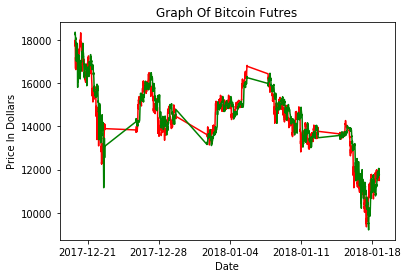

In [58]:
#Theoretical future price against real futures price for december to january

#The gaps in the graph come from futures not trading on weekends

import matplotlib.pyplot as plt

plt.plot(df1['Close Fut'],color = 'r')
plt.plot(df1['Theoretical Futures Price'],color = 'g')
plt.xlabel('Date')
plt.ylabel('Price In Dollars')
plt.title('Graph Of Bitcoin Futres')
plt.show()

In [45]:
#This looks pretty good but what does the two sample t test say

from scipy import stats

stats.ttest_ind(df1['Close Fut'], df1['Theoretical Futures Price'])

Ttest_indResult(statistic=-1.9568308192382131, pvalue=0.050427716913963354)

In [46]:
#And the mean absolute difference 

abs(df1['Close Fut']-df1['Theoretical Futures Price']).mean()

469.91763345288723

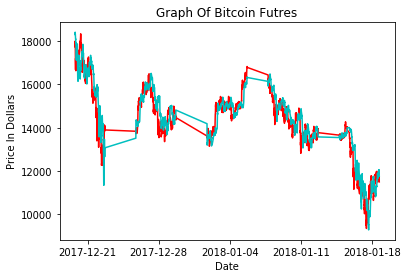

In [93]:
#Theoretical using 1 tick VWOP future price against real futures price for december to january

import matplotlib.pyplot as plt

plt.plot(df1['Close Fut'],color = 'r')
plt.plot(df1['1 Tick Theoretical Futures price'],color = 'c')
plt.xlabel('Date')
plt.ylabel('Price In Dollars')
plt.title('Graph Of Bitcoin Futres')
plt.show()

In [60]:
# T-Test for equality

stats.ttest_ind(df1['Close Fut'], df1['1 Tick Theoretical Futures price'])

Ttest_indResult(statistic=-2.5694854089769712, pvalue=0.010216167150953977)

In [61]:
# Mean Absolute Difference

abs(df1['Close Fut']-df1['1 Tick Theoretical Futures price']).mean()

475.0250691367784

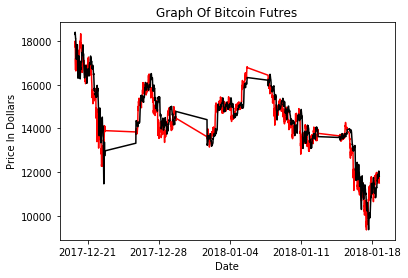

In [96]:
#Theoretical using 3 tick VWOP future price against real futures price for december to january

import matplotlib.pyplot as plt

plt.plot(df1['Close Fut'],color = 'r')
plt.plot(df1['3 Tick Theoretical Futures Price'],color = 'k')
plt.xlabel('Date')
plt.ylabel('Price In Dollars')
plt.title('Graph Of Bitcoin Futres')
plt.show()

In [67]:
# T-Test for equality

stats.ttest_ind(df1['Close Fut'], df1['3 Tick Theoretical Futures Price'])

Ttest_indResult(statistic=-2.5876080209780059, pvalue=0.0096948428697922959)

In [68]:
# Mean Absolute Difference

abs(df1['Close Fut']-df1['3 Tick Theoretical Futures Price']).mean()

477.2293447425095

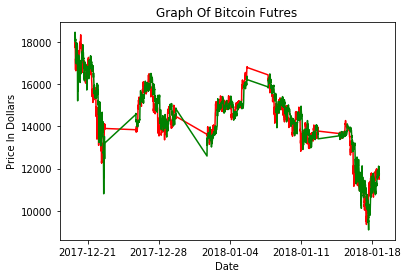

In [91]:
#Theoretical future price using exponential smoothing against real futures price for december to january

import matplotlib.pyplot as plt

plt.plot(df1['Close Fut'],color = 'r')
plt.plot(df1['EXP Theoretical Future price'],color = 'g')
plt.xlabel('Date')
plt.ylabel('Price In Dollars')
plt.title('Graph Of Bitcoin Futres')
plt.show()

In [72]:
# T-Test for equality

stats.ttest_ind(df1['Close Fut'], df1['EXP Theoretical Future price'])

Ttest_indResult(statistic=-1.7924119196645498, pvalue=0.073132639070339026)

In [73]:
# Mean Absolute Difference

abs(df1['Close Fut']-df1['EXP Theoretical Future price']).mean()

473.0855502974376

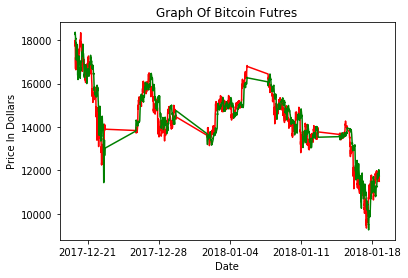

In [74]:
#Theoretical future price using kalman filters against real futures price for december to january

import matplotlib.pyplot as plt

plt.plot(df1['Close Fut'],color = 'r')
plt.plot(df1['Kalman Theoretical Future Price'],color = 'g')
plt.xlabel('Date')
plt.ylabel('Price In Dollars')
plt.title('Graph Of Bitcoin Futres')
plt.show()

In [75]:
# T-Test for equality

stats.ttest_ind(df1['Close Fut'], df1['Kalman Theoretical Future Price'])

Ttest_indResult(statistic=-1.8535811941286717, pvalue=0.06386302574667295)

In [76]:
# Mean Absolute Difference

abs(df1['Close Fut']-df1['Kalman Theoretical Future Price']).mean()

469.33671845505904

# Can we do any better?

• This problem seems like a prefect time to use machine learning

• Gauss was trying to approximate the position of the sun where in went out of view

• We have a similar issue where we have a system of inputs that should create the price of the future but we can't figure out exactly how

In [78]:
from sklearn.cross_validation import train_test_split
from sklearn import linear_model

#droping all the features which we should not have

features = df1.drop(['High Fut','Low Fut', 'Close Fut','SMAVG (5) on Close','SMAVG (10) on Close','SMAVG (15) on Close'],axis = 1)

features['Time Till Completion'] = 1 - features['Time Till Completion'] 

#Creating a train test split to ensure model accuracy

features=features.fillna(0)

x_train, x_test, y_train, y_test = train_test_split(features, df1['Close Fut'].astype(float), random_state= 67, test_size=.2)

#Determining model with best possible R^2 score Alpha

for i in range(1,5):
    model = linear_model.Lasso(alpha=.25*i)
    model.fit(x_train,y_train)
    print(i, model.score(x_test,y_test))

/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(1, 0.99594482035735632)
(2, 0.99594425191827352)
(3, 0.99594369212985656)
(4, 0.99594313097354081)


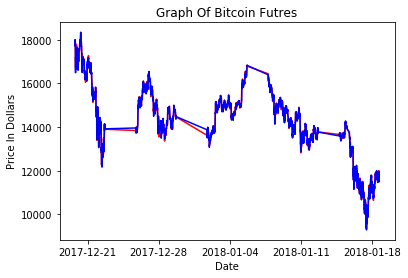

In [97]:
#Theoretical using Lasso Regession future price against real futures price for december to january

model = linear_model.Lasso(alpha=.25*i)
model.fit(x_train,y_train)
df1['Prediction'] = model.predict(features)

import matplotlib.pyplot as plt

plt.plot(df1['Close Fut'],color = 'r')
plt.plot(df1['Prediction'],color = 'b')
plt.xlabel('Date')
plt.ylabel('Price In Dollars')
plt.title('Graph Of Bitcoin Futres')
plt.show()

In [86]:
# T-Test for equality

stats.ttest_ind(df1['Close Fut'], df1['Prediction'])

Ttest_indResult(statistic=0.072438015517034146, pvalue=0.94225647877392538)

In [87]:
# Mean Absolute Difference

abs(df1['Close Fut']-df1['Prediction']).mean()

66.31356536879646

# Conclusion

• No arbitrage model might not fit because of volaitily or lack of market effeciency

• Bitcoin futures are traded on contract size of 5 Bitcoin per contract, with limiting barrier for entry could cause limited price discovery

• There are explinations for a price to high, contango, and a price to low, backwardation, this price fulxuated between too high and too low

# Thank you for your time, I will now take questions